# Imports

In [1]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
import pickle
import re
import six
%matplotlib inline

# Análises

In [6]:
df_processos = pd.read_json('database/processos_totais.json')

In [7]:
df_processos.head()

,numero,juizo,classe_CNJ,eletronico,comarca,instancia,estado,andamentos_qtd,assuntos,andamentos,ano
0,1774826420128169984,Segunda Vara de Violência Doméstica e Familiar...,Inquérito Policial,False,Recife,1GRAU,PE,4,[Crimes Previstos no Estatuto do Idoso],"[{'complemento': 'Central de Inquéritos', 'dat...",2012
1,1736234020128169984,Segunda Vara de Violência Doméstica e Familiar...,Inquérito Policial,False,Recife,1GRAU,PE,22,[Crimes Previstos no Estatuto do Idoso],"[{'complemento': 'Central de Inquéritos', 'dat...",2012
10,207123320188170016,Primeira Vara de Violência Doméstica e Familia...,Ação Penal - Procedimento Sumário,False,Recife,1GRAU,PE,10,[Ameaça],"[{'complemento': '', 'data': '18/01/2019 17:20...",2018
100,202533120188170016,Primeira Vara de Violência Doméstica e Familia...,Inquérito Policial,False,Recife,1GRAU,PE,12,"[Violência Doméstica Contra a Mulher, Ameaça]","[{'complemento': 'Central de Inquéritos', 'dat...",2018
1000,1376615820098170112,Terceira Vara de Violência Doméstica e Familia...,Ação Penal - Procedimento Sumário,False,Recife,1GRAU,PE,91,[Leve],"[{'complemento': '', 'data': '11/10/2018 10:16...",2009


# Juizos

In [109]:
juizos = df_processos['juizo']

In [114]:
juizos.value_counts()[:10]

Terceira Vara de Violência Doméstica e Familiar contra a Mulher na Comarca da Capital    6713
Primeira Vara de Violência Doméstica e Familiar contra a Mulher na Comarca da Capital    3574
Segunda Vara de Violência Doméstica e Familiar contra a Mulher na Comarca da Capital     2245
Segunda Vara dos Crimes contra Criança e Adolescente da Capital                           209
Primeira Vara dos Crimes contra Criança e Adolescente da Capital                          169
Vara de Execução de Penas Alternativas da Capital                                         108
Distrito Estadual do Arquipélago Fernando de Noronha                                       45
Quarta Vara Criminal da Capital                                                            23
Segunda Vara Criminal da Capital                                                           22
Primeira Vara Criminal da Capital                                                          20
Name: juizo, dtype: int64

In [115]:
principais_juizos = juizos.value_counts()[:10]

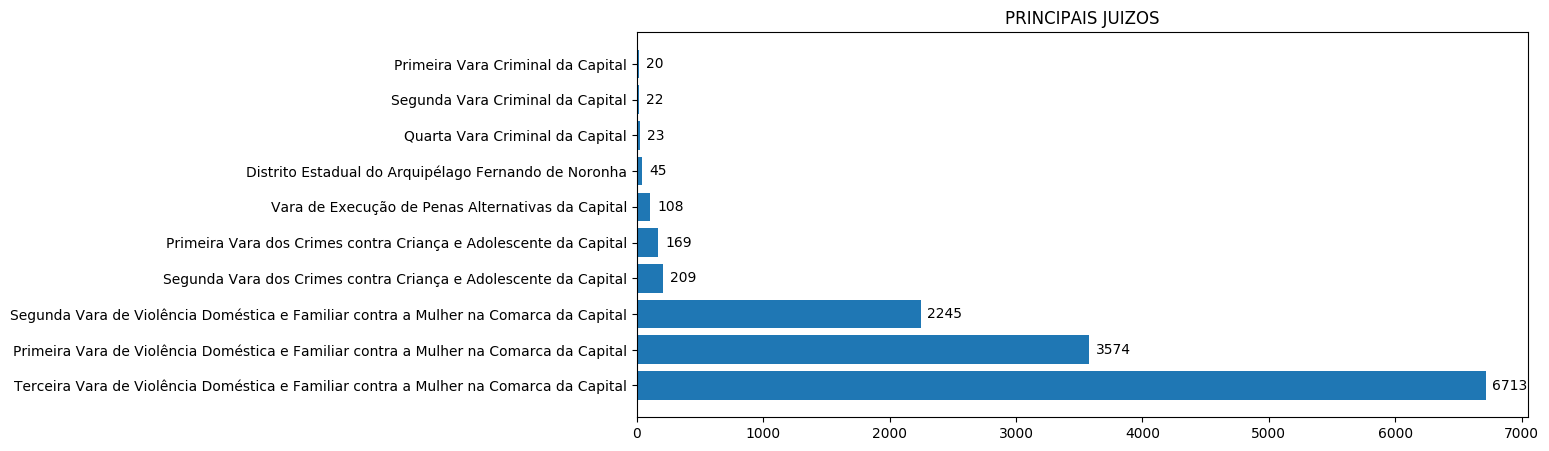

In [151]:
plt.rcdefaults()
fig, ax = plt.subplots()

y_pos = np.arange(len(principais_juizos.values))
performance = np.random.rand(len(principais_juizos.values))

rects = ax.barh(y_pos, principais_juizos.values, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(principais_juizos.index)


# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative: Place label left of bar
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label at right
        ha = 'right'

    # Use X value as label and format number with one decimal place
    label = "{}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha) 
    
title = 'principais_juizos_cnj'
fig.set_size_inches(11.5, 5, forward=True)
fig.savefig('figures/{}'.format(title), dpi=100, bbox_inches='tight')
plt.title('PRINCIPAIS JUIZOS')
plt.show()

## Classes CNJs

In [16]:
classe_cnj = df_processos['classe_CNJ']

In [23]:
classe_cnj.value_counts()[:10]

Medidas Protetivas de urgência (Lei Maria da Penha) Criminal    4673
Ação Penal - Procedimento Sumário                               4499
Inquérito Policial                                              1546
Medidas Protetivas de urgência (Lei Maria da Penha)             1500
Ação Penal - Procedimento Ordinário                              782
Auto de Prisão em Flagrante                                      188
Representação Criminal/Notícia de Crime                           59
Insanidade Mental do Acusado                                      17
Ação Penal de Competência do Júri                                 17
Incidente de Falsidade                                             5
Name: classe_CNJ, dtype: int64

In [24]:
principais_classes_cnj = classe_cnj.value_counts()[:10]

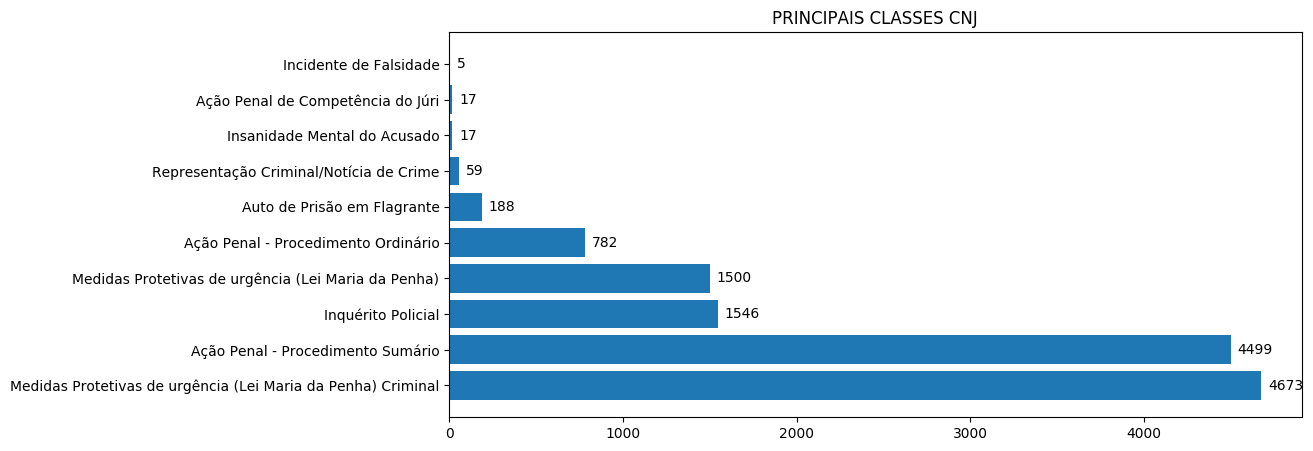

In [155]:
plt.rcdefaults()
fig, ax = plt.subplots()

y_pos = np.arange(len(principais_classes_cnj.values))
performance = np.random.rand(len(principais_classes_cnj.values))

rects = ax.barh(y_pos, principais_classes_cnj.values, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(principais_classes_cnj.index)

# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative: Place label left of bar
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label at right
        ha = 'right'

    # Use X value as label and format number with one decimal place
    label = "{}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha) 

title = 'principais_classes_cnj'
fig.set_size_inches(11, 5, forward=True)
fig.savefig('figures/{}'.format(title), dpi=100, bbox_inches='tight')
plt.title('PRINCIPAIS CLASSES CNJ')
plt.show()

# Quantidade de andamentos em um processo

In [124]:
df_processos['andamentos_qtd'].describe()''

count    13300.000000
mean        22.959474
std         19.666819
min          1.000000
25%         10.000000
50%         15.000000
75%         30.000000
max        197.000000
Name: andamentos_qtd, dtype: float64

# Assuntos

In [125]:
assuntos = df_processos['assuntos']

In [127]:
assuntos.value_counts()[:10]

[Ameaça]                                                                    3431
[Decorrente de Violência Doméstica]                                         2972
[Violência Doméstica Contra a Mulher, Ameaça]                               1055
[Injúria]                                                                    594
[Violência Doméstica Contra a Mulher, Injúria, Ameaça]                       515
[Decorrente de Violência Doméstica, Violência Doméstica Contra a Mulher]     499
[Leve]                                                                       482
[Decorrente de Violência Doméstica, Ameaça]                                  334
[Contravenções Penais]                                                       300
[Injúria, Ameaça]                                                            277
Name: assuntos, dtype: int64

## Conjunto de assuntos

In [158]:
principais_conj_assuntos = assuntos.value_counts()[:10]

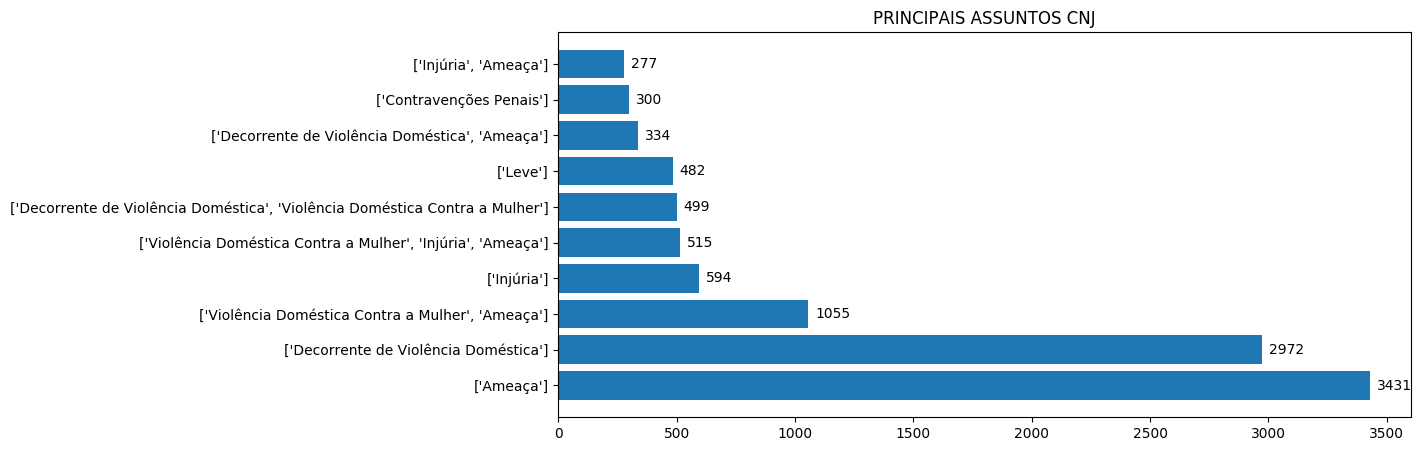

In [160]:
plt.rcdefaults()
fig, ax = plt.subplots()

y_pos = np.arange(len(principais_conj_assuntos.values))
performance = np.random.rand(len(principais_conj_assuntos.values))

rects = ax.barh(y_pos, principais_conj_assuntos.values, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(principais_conj_assuntos.index)

# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative: Place label left of bar
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label at right
        ha = 'right'

    # Use X value as label and format number with one decimal place
    label = "{}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha) 

title = 'principais_conj_assuntos_cnj'
fig.set_size_inches(11, 5, forward=True)
fig.savefig('figures/{}'.format(title), dpi=100, bbox_inches='tight')
plt.title('PRINCIPAIS ASSUNTOS CNJ')
plt.show()

## Assuntos isolados

In [130]:
assuntos_completos = []
for assunto in assuntos:
    for asu in assunto:
        assuntos_completos.append(asu)

In [135]:
assuntos_completos = pd.Series(assuntos_completos)

In [137]:
assuntos_completos.value_counts()[:10]

Ameaça                                 7032
Decorrente de Violência Doméstica      4756
Violência Doméstica Contra a Mulher    3721
Injúria                                2312
Contravenções Penais                    832
Leve                                    553
Difamação                               308
Dano                                    293
Violação de domicílio                   193
Estupro                                  87
dtype: int64

In [156]:
principais_assuntos = assuntos_completos.value_counts()[:10]

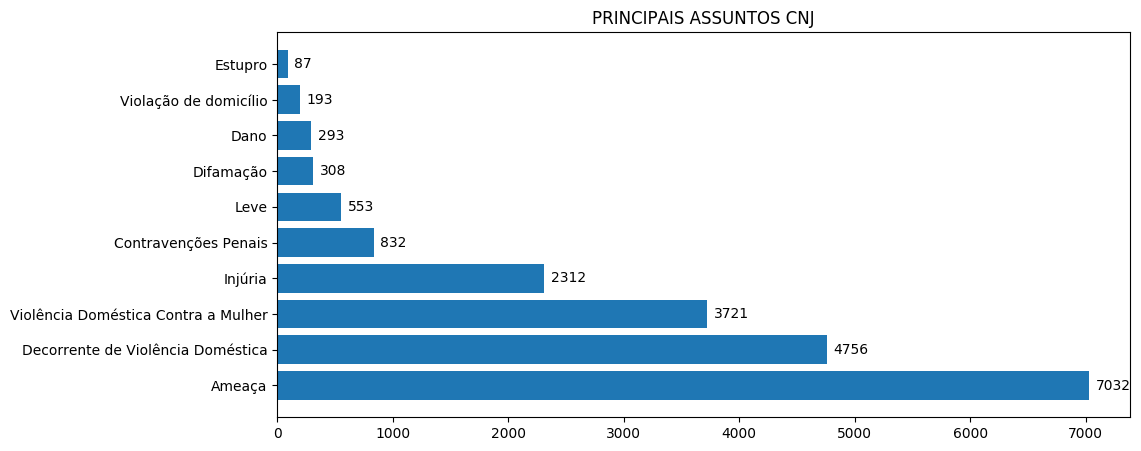

In [157]:
plt.rcdefaults()
fig, ax = plt.subplots()

y_pos = np.arange(len(principais_assuntos.values))
performance = np.random.rand(len(principais_assuntos.values))

rects = ax.barh(y_pos, principais_assuntos.values, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(principais_assuntos.index)

# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative: Place label left of bar
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label at right
        ha = 'right'

    # Use X value as label and format number with one decimal place
    label = "{}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha) 

title = 'principais_assuntos_cnj'
fig.set_size_inches(11, 5, forward=True)
fig.savefig('figures/{}'.format(title), dpi=100, bbox_inches='tight')
plt.title('PRINCIPAIS ASSUNTOS CNJ')
plt.show()

# Andamentos

In [162]:
andamentos = df_processos['andamentos']

In [164]:
andamentos[0]

[{'complemento': 'Central de Inquéritos',
  'data': '30/08/2013 14:58:00',
  'texto': '',
  'titulo': 'Autos entregues em carga ao Central de Inquéritos'},
 {'complemento': '',
  'data': '28/08/2013 14:42:00',
  'texto': 'Tribunal de Justiça de Pernambuco\r\n2ª Vara de Violência Doméstica e Familiar contra a Mulher\r\n\r\n\r\n\r\n\r\n      DESPACHO:\r\n\t\t\t\t\r\n\r\n\tVistos etc.\r\n\r\n      Remetam-se os autos à Central de Inquéritos do Ministério Público para que, no prazo do art. 46 do CPP, adote as providências cabíveis.\r\n      \r\n      \r\n      Recife, 28 de agosto de 2013.\r\n         \r\n         \r\n              Roberta Viana Jardim\r\n                      Juíza de Direito\r\n\r\n\r\nNesta data recebi os presentes \r\nautos da MM. Juíza de Direito.\r\n\r\nRecife, \r\n\r\n_________________________\r\n    \t\t\t\t\t\t\t\t    Chefe de Secretaria',
  'titulo': 'Determinação de cumprimento de atos processuais pela Secretaria'},
 {'complemento': 'Despacho',
  'data': '19/11/